In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon
import seaborn as sns

Use this code to decide who chairs the next group meeting. All members of the strong gravity group are on the list and have a probability of being chosen. The probability decreases depending on research position. From lowest to highest:(faculty,postdoc,graduate). The probability further decreases if a member speaks during a meeting. The probability will be sampled from an exponential distribution,
$$p(x; \mu, \sigma) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$
for $x>0$. 

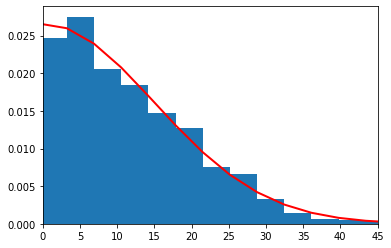

In [352]:
mu, sigma = 0, 15 # mean and standard deviation
s = np.random.normal(mu, sigma, 2000)
count, bins, ignored = plt.hist(s, 25, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlim([0,45])
plt.show()

In [353]:
# Load list of people 

list_of_people_d = pd.read_csv('gravitygroup.csv',header=0, dtype=str)
list_of_people = pd.DataFrame(data = list_of_people_d)

number_of_people = len(list_of_people)

# Input Chair

chair = 'Anna'

chair_index = list_of_people['Nickname'][list_of_people['Nickname'] == chair].index[0]

# Add +1 to chair to csv file

# Input Speaker

speakers = ['Tim','Max']

# Input People who spoke

spoke = ['']

In [354]:
# Order name by points
point_list = np.zeros(number_of_people)
list_of_people['points'] = point_list
# Go through list and add points
for i in list_of_people['Nickname']:
    # Gain points from chairing
    temp_index = list_of_people['Nickname'][list_of_people['Nickname'] == i].index[0]
    list_of_people['points'][temp_index] = list_of_people['points'][temp_index] + 0.1*np.int(list_of_people['Chaired'][temp_index])
    # Gain 2 points for faculty
    if list_of_people['Group status'][temp_index] in ['Faculty']:
        list_of_people['points'][temp_index] = list_of_people['points'][temp_index] + 2
        print(list_of_people['Nickname'][temp_index],"+2")
    # Gain 1 point for PostDoc
    if list_of_people['Group status'][temp_index] in ['Post Doc']:
        list_of_people['points'][temp_index] = list_of_people['points'][temp_index] + 1
        print(list_of_people['Nickname'][temp_index],"+1")
    # Gain points for speaking
    if i in speakers:
        list_of_people['points'][temp_index] = list_of_people['points'][temp_index] + 2
        print(list_of_people['Nickname'][temp_index],"+2")
    # Add point for speaking
    if i in spoke:
        list_of_people['points'][temp_index] = list_of_people['points'][temp_index] + 1
        print(list_of_people['Nickname'][temp_index],"+1")

# Sort by points and re index
sorted_list = list_of_people.sort_values(by=['points'])
rsorted_list = sorted_list.reset_index()

Anna +1
Daniel +2
Eric +2
Erik +2
Huan +2
Luis +2
Max +2
Niayesh +2
Tim +2
Will +2
Yuan +1
Zhen +1


/home/t/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/t/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/t/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()

In [360]:
# Find a chair
found_chair = False
while(not found_chair):
    proposed_chair = np.round(np.random.normal(mu, sigma))
    if proposed_chair > 0:
        if proposed_chair < number_of_people:
            if proposed_chair != chair_index:
                next_chair = proposed_chair
                found_chair = True

print(rsorted_list['Nickname'][next_chair])

Anna
